## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing from nltk library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, RocCurveDisplay, roc_curve, auc, classification_report  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import  TfidfVectorizer

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Importing data from final_df.csv
final_df = pd.read_csv("./data/final_df.csv", encoding="utf-8")

In [3]:
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', 100)

# Checking the fist 5 rows of final_df
final_df.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,cleaned_lyrics,word_count,hit,a cappella,acoustic pop,acoustic rock,adult contemporary,adult standards,afrobeats,afrofuturism,afropop,afroswing,alabama indie,alabama metal,alabama rap,alaska indie,alberta country,album rock,albuquerque indie,alt z,alternative dance,alternative hip hop,alternative metal,alternative pop,alternative r&b,alternative rock,alternative roots rock,american folk revival,ann arbor indie,anti-folk,arkansas country,arkansas hip hop,art pop,art rock,asian american hip hop,athens indie,atl hip hop,atl trap,atlanta bass,atlanta punk,aussietronica,...,trancecore,transpop,trap,trap boricua,trap latino,trap queen,trap soul,traphall,tribal house,trinibad,trip hop,tropical,tropical house,turntablism,uk alternative pop,uk americana,uk contemporary r&b,uk dance,uk funky,uk garage,uk hip hop,uk pop,underground hip hop,upstate ny rap,urban contemporary,urbano latino,vapor pop,vapor trap,vincy soca,viral pop,viral rap,viral trap,virgin islands reggae,virginia hip hop,vocal house,vocal jazz,voice,washington indie,west coast rap,west coast trap,west end,westcoast flow,western swing,women's music,world worship,worship,wrestling,wu fam,yacht rock,yodeling
0,0.543,0.697,-9.211,0.0612,0.00206,0.3430,0.861,5.225628,11.870880,Don t wanna be a Canadian idiot Don t wanna be...,5.463832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.791,0.613,-11.628,0.0763,0.09860,0.0765,0.896,4.962964,12.047311,They see me mowin my front lawn I know they re...,6.532334,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.897,0.430,-12.759,0.0551,0.01180,0.0473,0.964,4.803914,12.315465,Everybody shut up Woo Everyone listen up Hey h...,6.535241,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.610,0.926,-4.843,0.0479,0.03100,0.0821,0.861,5.151197,12.208071,Justin All Hey hey Bye bye bye Bye bye Bye bye...,6.228511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.495,0.704,-5.260,0.0331,0.01840,0.1900,0.407,5.159377,12.387281,Chris Oh oh oh oh Oh oh oh oh oh Chris Lying...,6.028279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
final_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'cleaned_lyrics',
       ...
       'west end', 'westcoast flow', 'western swing', 'women's music',
       'world worship', 'worship', 'wrestling', 'wu fam', 'yacht rock',
       'yodeling'],
      dtype='object', length=598)

## Process / Vectorize cleaned_lyrics

In [5]:
# Create WordNetLemmatizer instance
lemmatizer = WordNetLemmatizer()

# Define the tokenizer function with WordNet Lemmatizer
def tokenize(text):
    tokens = word_tokenize(text.lower())
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    return lemma

In [6]:
# Original stop words
original_stop_terms = list(TfidfVectorizer(stop_words='english').get_stop_words())

# Additional stop words to be included
additional_stop_terms = ["'d", "'ll", "'re", "'s", "'ve", 'doe', 'ha', 'le', "n't", 'need', 'sha', 'u', 'wa', 'wo',
                        "verse", "chorus", "yeah", "said", "ain't","shit","yeah yeah","oh oh","take","love","got","nigga",
                        "go","say","give","life","need","time","want","way","cause","feel","know","put","thing","make","came",
                        "might","right","tell","man","girl","night","come","let","back","think","keep","look","day","now",
                        "got","one","will","fuck","la la","heart","lyrics","boy","bitch","wanna","head","gon'","friend",
                        "pre chorus","eye","see","world","ooh ooh","made","mind","still","call","good","intro","na na","play",
                        "hand", "turn","better","outro","never","everything","show","hit","bridge","baby", "money","even",
                        "gonna","little","leave","real","yeah yeah","name","ya","hold","body","try","stop","around","light",
                        "ain","face","m","niggas","hey hey","bitches","ah ah","feeling","tonight","long","uh uh","something",
                        "da da","eyes","alone","crazy","break","believe","oh","gone","really","dream","ass","friends","post",
                        "run","ah ah","fall","watch","wrong","talk","done","ma","won","told","y","home","damn","hard","used",
                        "nothing","live","mine","big","place","gotta","every","end","away","ride","new","stay","everybody",
                        "'", "ai", "choru", "gon", "la", "lyric", "na", "oh", "ooh", "pre", "wan"]

# Combine original and additional stop words
stop_terms = original_stop_terms + additional_stop_terms

In [7]:
# Create TfidVectorizer object with custom tokenizer
vectorizer = TfidfVectorizer(max_features=3500, ngram_range=(1,6),tokenizer=tokenize, stop_words=stop_terms)

## Setting the Training/Test set

In [8]:
# Define the features (X) and the target variable (y)
X = final_df.drop(['hit'], axis=1)
y = final_df['hit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Setting up the preprocessor

In [9]:
# define numerical features and text feature
num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
text_col='cleaned_lyrics'

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("text", vectorizer, text_col),
        ("pca", PCA(n_components=2, svd_solver='full'), num_cols)
    ])

## KNearest Neighbor (Baseline Model)

C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ah', 'da', 'hey', 'ta', 'uh'] not in stop_words.
  warnings.warn(
C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Accuracy: 0.5949579831932773
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.65      0.64      0.65      1031
           1       0.52      0.53      0.53       754

    accuracy                           0.59      1785
   macro avg       0.59      0.59      0.59      1785
weighted avg       0.60      0.59      0.60      1785

Confusion Matrix (KNearest Neigbor):


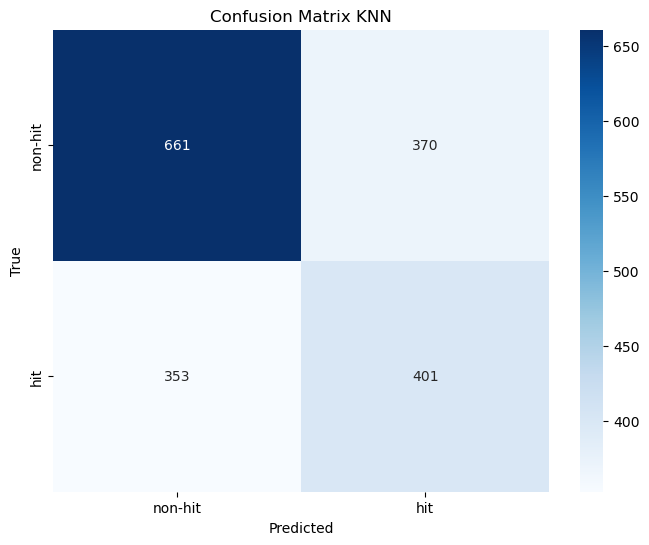

In [10]:
# Create the pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply standard scaling and vectorization to the features
    ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree'))  # Gradient Booster Classifier
])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
knn_accuracy = knn_pipeline.score(X_test, y_test)
knn_report = classification_report(y_test, y_pred)

print("Accuracy:", knn_accuracy)
print("Classification Report (KNN):\n", knn_report)
print("Confusion Matrix (KNearest Neigbor):")

# Plot confusion matrix
# Create the confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)

# Define the labels for the classes
class_labels = ['non-hit', 'hit']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix KNN")

plt.show()

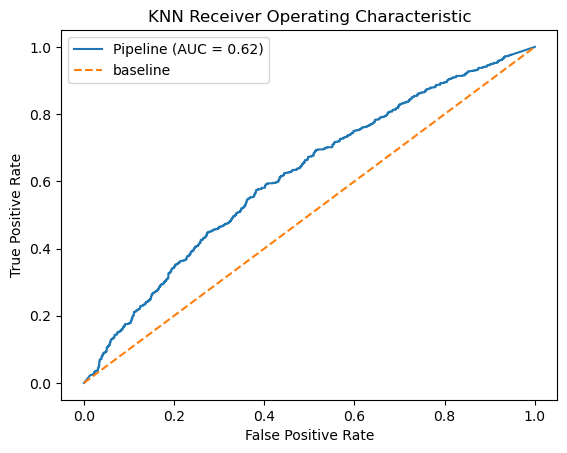

In [11]:
# ROC curve plot for KNN model
RocCurveDisplay.from_estimator(knn_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.legend()
plt.show();

## Random Forest Classifier

C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ah', 'da', 'hey', 'ta', 'uh'] not in stop_words.
  warnings.warn(


Accuracy: 0.6296918767507003
Classification Report (RFC):
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      1031
           1       0.56      0.58      0.57       754

    accuracy                           0.63      1785
   macro avg       0.62      0.62      0.62      1785
weighted avg       0.63      0.63      0.63      1785

Confusion Matrix (Random Forest Classifier):


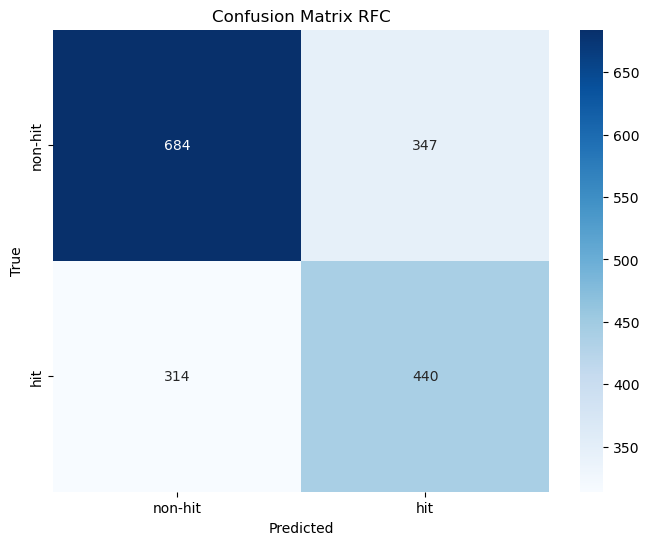

In [12]:
# Create the pipeline
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply standard scaling and vectorization to the features
    ('rfc', RandomForestClassifier(class_weight='balanced',max_depth=10))
])

# Fit the pipeline to the training data
rfc_pipeline.fit(X_train, y_train)

y_pred = rfc_pipeline.predict(X_test)

# Evaluate the model
rfc_accuracy = rfc_pipeline.score(X_test, y_test)
rfc_report = classification_report(y_test, y_pred)

print("Accuracy:", rfc_accuracy)
print("Classification Report (RFC):\n", rfc_report)
print("Confusion Matrix (Random Forest Classifier):")

# Plot confusion matrix
# Create the confusion matrix
rfc_cm = confusion_matrix(y_test, y_pred)

# Define the labels for the classes
class_labels = ['non-hit', 'hit']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix RFC")

plt.show()

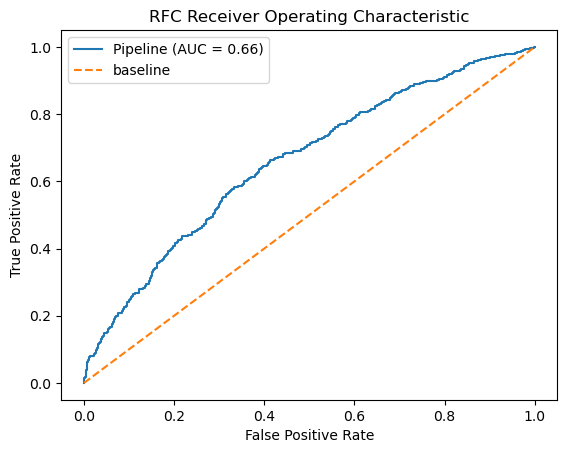

In [13]:
# ROC curve plot for RFC model
RocCurveDisplay.from_estimator(rfc_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.legend()
plt.show();

## Gradient Booster Classifier

C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\wongh\anaconda3\envs\dsi-sg\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ah', 'da', 'hey', 'ta', 'uh'] not in stop_words.
  warnings.warn(


Accuracy: 0.6285714285714286
Classification Report (GBC):
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1031
           1       0.58      0.44      0.50       754

    accuracy                           0.63      1785
   macro avg       0.62      0.60      0.60      1785
weighted avg       0.62      0.63      0.62      1785

Confusion Matrix (Gradient Boost Classifier):


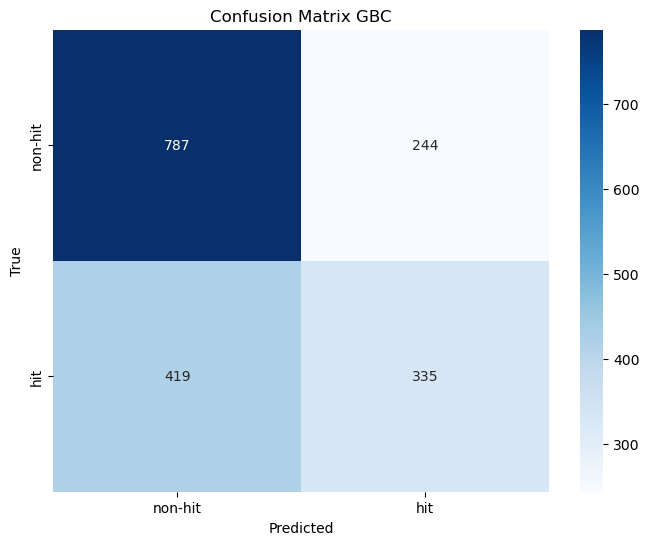

In [14]:
# Create the pipeline
gbc_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply standard scaling and vectorization to the features
    ('gbc', GradientBoostingClassifier(max_features=2000, max_depth=10, learning_rate=0.1,subsample=1.0))  # Gradient Booster Classifier
])

# Fit the pipeline to the training data
gbc_pipeline.fit(X_train, y_train)

y_pred = gbc_pipeline.predict(X_test)

# Evaluate the model
gbc_accuracy = gbc_pipeline.score(X_test, y_test)
gbc_report = classification_report(y_test, y_pred)

print("Accuracy:", gbc_accuracy)
print("Classification Report (GBC):\n", gbc_report)
print("Confusion Matrix (Gradient Boost Classifier):")

# Plot confusion matrix
# Create the confusion matrix
gbc_cm = confusion_matrix(y_test, y_pred)

# Define the labels for the classes
class_labels = ['non-hit', 'hit']

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(gbc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix GBC")

plt.show()

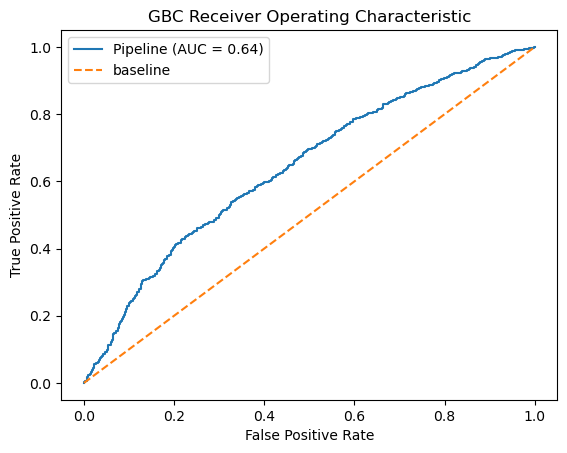

In [15]:
# ROC curve plot for GBC model
RocCurveDisplay.from_estimator(gbc_pipeline, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.legend()
plt.show();

## Models Analysis

In [18]:
# Create dataframes of AUC scores for each model
auc_scores = {'KNN': 0.62, 'RFC': 0.66, 'GBC': 0.64}

# Convert dictionary to dataframe
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC Score'])

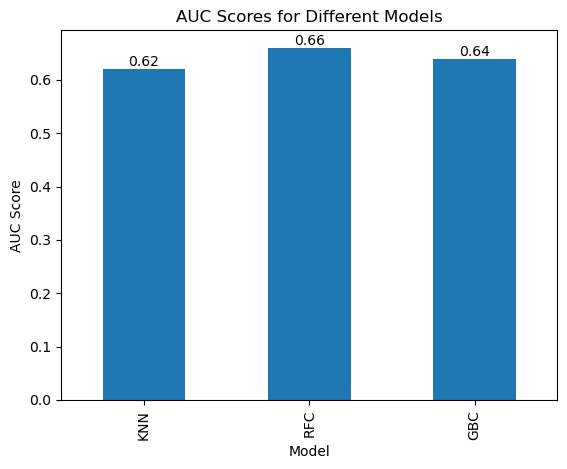

In [19]:
# PLot the  AUC scores for different models
ax=auc_df.plot(y='AUC Score', kind='bar', legend=False)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Models')

# Add y-values on each bar
for i, score in enumerate(auc_df['AUC Score']):
    ax.text(i, score, str(score), ha='center', va='bottom')

plt.show()

## Conclusions

It can be seen from the AUC scores barplots for different models, that the RFC model has the highest AUC score of 0.66 among the rest of the models. Hence, we will use the Random Forest Classifier as the best predictive model for Billboard hits prediction.

Record Companies can use our predictive model to reduce the risk of investing resources in records/songs that are unlikely to be a hit. Our model which has an AUC score of 0.66 means that it is better discriminatory power than a random prediction of whether the song is a hit.